# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [47]:
m = 1
A = 0.001#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [48]:
global loggrid=false
global bisection=false
global meshrefinement=false;

In [49]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [50]:
print(N)

400.0

In [51]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [52]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [53]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.0025
the time step is 0.00125


In [54]:
"""using Plots
plot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])"""

"using Plots\nplot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])"

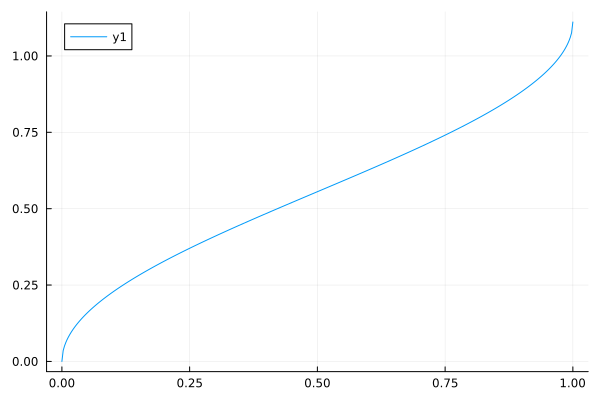

In [55]:
using Plots
plot(initX1, inverse.(initX1))

# Initial data of m β Ψ and Ψ,x

In [56]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)

#PSI
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [57]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

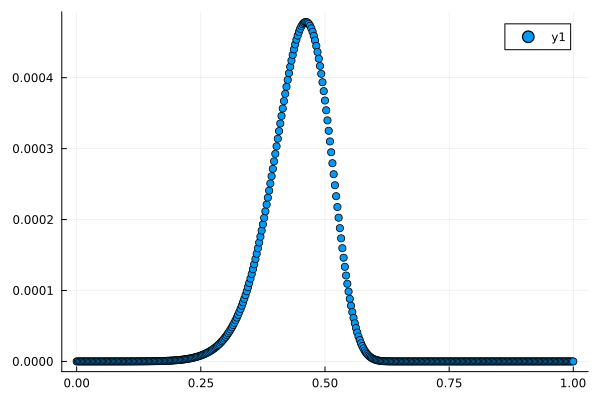

In [58]:
scatter(initX[4:L-3], init_gaussian(initX[4:L-3],r0,sigma,A))

In [59]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [60]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

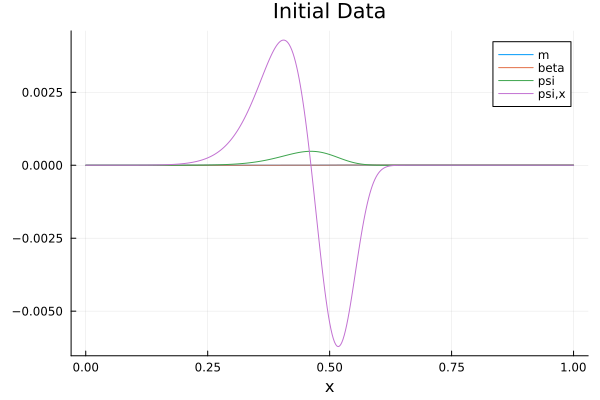

In [61]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [62]:
global gridinterp=Spline1D(originalX,initX,k=4)
"""plot(originalX, gridinterp(originalX),xlim=[0,1])


plot(initX1, jacobian_func.(initX1))
plot(initX1, jacobian_func.(gridinterp.(initX1)))""";

LoadError: UndefVarError: originalX not defined

In [63]:
#inverse.(initX1)

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [64]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [65]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [66]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0100376253918


In [67]:
using Base.Threads
Threads.nthreads()

4

In [68]:
aux=zeros(L)
yy=init_gaussian_der(initX,r0,sigma,A)

for i in 4:L-3
    aux[i]=Dertest(yy,i,originalX)
end
plot(initX,aux)



LoadError: UndefVarError: originalX not defined

 ## Time evolution

fixed grid

In [69]:
finaltime=1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 1 dt is 0.00251254703173975, t=0.00251254703173975 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 2 dt is 0.00251254703173975, t=0.0050250940634795 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 3 dt is 0.00251254703173975, t=0.00753764109521925 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 4 dt is 0.00251254703173975, t=0.010050188126959 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 5 dt is 0.00251254703173975, t=0.01256273515869875 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 6 dt is 0.00251254703173975, t=0.0150752821904385 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 7 dt is 0.00251254703173975, t=0.01758782922217825 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 8 dt is 0.00251254703173975, t=0.020100376253918 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 9 dt is 0.00251254703173975, t=0.02261292328565775



iteration 80 dt is 0.00251254703173975, t=0.20100376253918023 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 81 dt is 0.00251254703173975, t=0.20351630957091998 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 82 dt is 0.00251254703173975, t=0.20602885660265974 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 83 dt is 0.00251254703173975, t=0.2085414036343995 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 84 dt is 0.00251254703173975, t=0.21105395066613925 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 85 dt is 0.00251254703173975, t=0.213566497697879 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 86 dt is 0.00251254703173975, t=0.21607904472961875 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 87 dt is 0.00251254703173975, t=0.2185915917613585 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 88 dt is 0.00251254703173975, t=0.22110413



iteration 157 dt is 0.00251254703173975, t=0.39446988398314126 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 158 dt is 0.00251254703173975, t=0.396982431014881 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 159 dt is 0.00251254703173975, t=0.39949497804662076 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 160 dt is 0.00251254703173975, t=0.4020075250783605 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 161 dt is 0.00251254703173975, t=0.40452007211010027 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 162 dt is 0.00251254703173975, t=0.40703261914184 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 163 dt is 0.00251254703173975, t=0.4095451661735798 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 164 dt is 0.00251254703173975, t=0.41205771320531953 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 165 dt is 0.00251254703173975, t=0.414



iteration 227 dt is 0.002512547031739751, t=0.570348176204924 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 228 dt is 0.00251254703173975, t=0.5728607232366637 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 229 dt is 0.00251254703173975, t=0.5753732702684035 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 230 dt is 0.00251254703173975, t=0.5778858173001432 speed is 0.4975031250000001, dx/dt=0.9950062500000001


iteration 231 dt is 0.002512547031739751, t=0.580398364331883 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 232 dt is 0.002512547031739751, t=0.5829109113636227 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 233 dt is 0.002512547031739751, t=0.5854234583953625 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 234 dt is 0.002512547031739751, t=0.5879360054271022 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 235 dt is 0.002512547031739751, t=0



iteration 306 dt is 0.0025125470317397514, t=0.7688393917123645 speed is 0.49750312499999977, dx/dt=0.9950062499999996


iteration 307 dt is 0.0025125470317397514, t=0.7713519387441042 speed is 0.4975031249999998, dx/dt=0.9950062499999996


iteration 308 dt is 0.002512547031739751, t=0.773864485775844 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 309 dt is 0.002512547031739751, t=0.7763770328075837 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 310 dt is 0.002512547031739751, t=0.7788895798393235 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 311 dt is 0.002512547031739751, t=0.7814021268710633 speed is 0.49750312499999993, dx/dt=0.9950062499999998


iteration 312 dt is 0.00251254703173975, t=0.783914673902803 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 313 dt is 0.00251254703173975, t=0.7864272209345428 speed is 0.49750312500000005, dx/dt=0.9950062500000001


iteration 314 dt is 0.00251254703173975, 



iteration 386 dt is 0.0025125470317404882, t=0.9698431542515737 speed is 0.4975031249998539, dx/dt=0.9950062499997078


iteration 387 dt is 0.002512547031740428, t=0.9723557012833142 speed is 0.4975031249998658, dx/dt=0.9950062499997316


iteration 388 dt is 0.002512547031740366, t=0.9748682483150546 speed is 0.49750312499987814, dx/dt=0.9950062499997563


iteration 389 dt is 0.0025125470317403035, t=0.9773807953467949 speed is 0.49750312499989047, dx/dt=0.9950062499997809


iteration 390 dt is 0.0025125470317402428, t=0.9798933423785351 speed is 0.4975031249999025, dx/dt=0.995006249999805


iteration 391 dt is 0.002512547031740183, t=0.9824058894102753 speed is 0.49750312499991434, dx/dt=0.9950062499998287


iteration 392 dt is 0.0025125470317401257, t=0.9849184364420154 speed is 0.49750312499992566, dx/dt=0.9950062499998514


iteration 393 dt is 0.0025125470317400715, t=0.9874309834737555 speed is 0.49750312499993643, dx/dt=0.9950062499998729


iteration 394 dt is 0.002512547031740



iteration 466 dt is 0.0025125470317397683, t=1.1708469167907665 speed is 0.49750312499999644, dx/dt=0.9950062499999929


iteration 467 dt is 0.0025125470317397644, t=1.1733594638225062 speed is 0.49750312499999727, dx/dt=0.9950062499999944


iteration 468 dt is 0.0025125470317397614, t=1.175872010854246 speed is 0.4975031249999978, dx/dt=0.9950062499999957


iteration 469 dt is 0.0025125470317397583, t=1.1783845578859857 speed is 0.49750312499999844, dx/dt=0.9950062499999969


iteration 470 dt is 0.002512547031739756, t=1.1808971049177255 speed is 0.4975031249999988, dx/dt=0.9950062499999978


iteration 471 dt is 0.002512547031739755, t=1.1834096519494652 speed is 0.49750312499999916, dx/dt=0.9950062499999982


iteration 472 dt is 0.002512547031739753, t=1.185922198981205 speed is 0.49750312499999944, dx/dt=0.9950062499999989


iteration 473 dt is 0.0025125470317397523, t=1.1884347460129447 speed is 0.4975031249999996, dx/dt=0.9950062499999993


iteration 474 dt is 0.0025125470317397

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.001.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.001.gif")
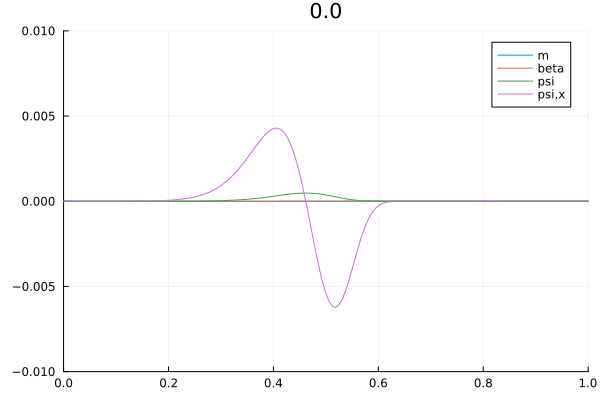

In [72]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:10:518
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [139]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [140]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

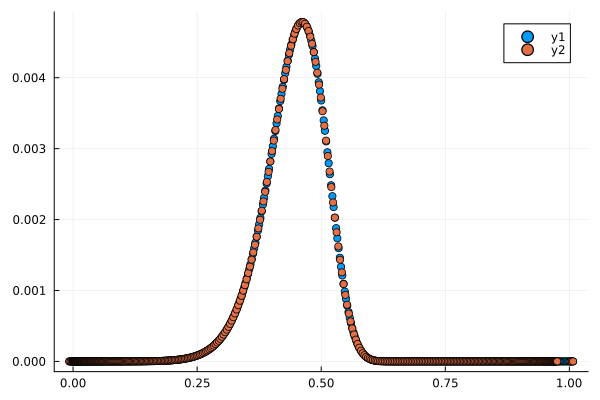

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

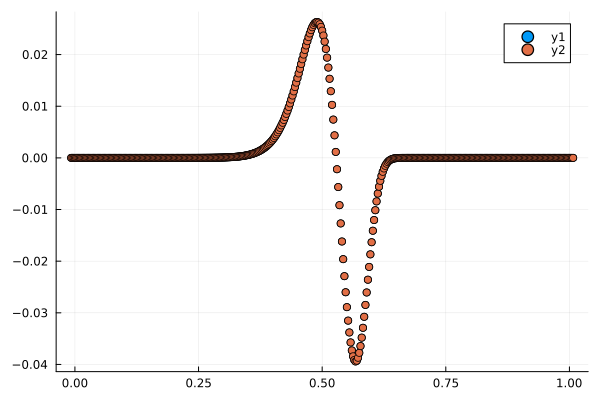

In [417]:
scatter([x1,x1],[y1,y2])